
# Colab Import Drive

In [0]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# ResNet50 MODEL

In [0]:
from keras.models import Model
from keras.layers import Input,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,concatenate,Activation,ZeroPadding2D
from keras.layers import add,Flatten
#from keras.layers.convolutional import Conv2D,MaxPooling2D,AveragePooling2D
import numpy as np
seed = 7
np.random.seed(seed)
 

def Conv2d_BN(x, nb_filter, kernel_size, strides=(1, 1), padding='same', name=None):
	if name is not None:
		bn_name = name + '_bn'
		conv_name = name + '_conv'
	else:
		bn_name = None
		conv_name = None
 
	x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides, name=conv_name)(x)
	x = BatchNormalization(axis=3, name=bn_name)(x)
	x = Activation('relu')(x)
	return x

def Conv_Block(inpt, nb_filter, kernel_size, strides=(1, 1), with_conv_shortcut=False):
	x = Conv2d_BN(inpt, nb_filter=nb_filter[0], kernel_size=(1, 1), strides=strides, padding='same')
	x = Conv2d_BN(x, nb_filter=nb_filter[1], kernel_size=(3, 3), padding='same')
	x = Conv2d_BN(x, nb_filter=nb_filter[2], kernel_size=(1, 1), padding='same')
	if with_conv_shortcut:
		shortcut = Conv2d_BN(inpt, nb_filter=nb_filter[2], strides=strides, kernel_size=kernel_size)
		x = add([x, shortcut])
		return x
	else:
		x = add([x, inpt])
		return x


 
inpt = Input(shape=(224, 224, 3))
x = ZeroPadding2D((3, 3))(inpt)
x = Conv2d_BN(x, nb_filter=64, kernel_size=(7, 7), strides=(2, 2), padding='valid')
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
 
x = Conv_Block(x, nb_filter=[64, 64, 256], kernel_size=(3, 3), strides=(1, 1), with_conv_shortcut=True)
x = Conv_Block(x, nb_filter=[64, 64, 256], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[64, 64, 256], kernel_size=(3, 3))
 
x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3))
 
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
 
x = Conv_Block(x, nb_filter=[512, 512, 2048], kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
x = Conv_Block(x, nb_filter=[512, 512, 2048], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[512, 512, 2048], kernel_size=(3, 3))
x = AveragePooling2D(pool_size=(7, 7))(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=inpt,outputs=x)



# Optimizer

In [0]:
import keras
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_54 (Conv2D)              (None, 112, 112, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
batch_normalization_54 (BatchNo (None, 112, 112, 64) 256         conv2d_54[0][0]                  
____________________________________________________________________________________________

# Plot ResNet50 Model

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/Colab Notebooks/my/model.png', show_shapes=True,)

# Augmentation Preprocessing

In [0]:
from keras.preprocessing.image import ImageDataGenerator

trdata = ImageDataGenerator(rescale = 1./255)
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/dataset_80_20/dataset_final/train",target_size=(224,224))
tsdata = ImageDataGenerator(rescale = 1./255)
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/dataset_80_20/dataset_final/test", target_size=(224,224))

Found 11633 images belonging to 10 classes.
Found 2906 images belonging to 10 classes.


# Model CheckPoint and Early Stopping

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/my/resnet_trial.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


# Fit Generator

In [0]:
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, epochs=150,callbacks=[checkpoint,early])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/150
  1/100 [..............................] - ETA: 1:36:33 - loss: 3.1314 - acc: 0.2812

# Accuracy

In [0]:
score,acc = model.evaluate(testdata,verbose=1)

print(acc)

# Confusion Matrix and Classification Report

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
class_labels = testdata.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
model = load_model('/content/drive/My Drive/Colab Notebooks/my/resnet_trial.h5')


#Confution Matrix and Classification Report
Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(testdata.classes, y_pred, target_names=target_names))

# Plotting Confusion Matrix

# Colorful CNF

In [0]:
import matplotlib.pyplot as plt
import sklearn
from itertools import product
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
# from keras.weights import load_weights


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
      for j in range (cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()





img_row, img_height, img_depth = 224,224,3
model = load_model('/content/drive/My Drive/Colab Notebooks/my/resnet.h5')

class_labels = testdata.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

predicted_classes = np.argmax(Y_pred, axis=1)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(testdata.classes, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

plt.show()

# Accuracy Plot

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
# plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


In [0]:
plt.plot(hist.history["acc"])
plt.title(" Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.show()

In [0]:
plt.plot(hist.history['val_acc'])
plt.title("validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [0]:
plt.plot(hist.history['loss'])
plt.title("Loss in training ")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [0]:
plt.plot(hist.history['val_loss'])
plt.title("Loss in validation ")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

#  Random Image Test Classifier


In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt


model = load_model('/content/drive/My Drive/Colab Notebooks/my/resnet.h5')

class_labels = testdata.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 800 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited = "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    t = cv2.putText(expanded_image, "true = "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2_imshow(t)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print(path_class)
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 224,224


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = '/content/drive/My Drive/Colab Notebooks/dataset_80_20/dataset_final/test/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    predictions.append(classes)


# make immutable dict to list
# dictlist = []
# for key, value in class_labels.items():
#     temp = [key,value]
#     dictlist.append(temp)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    print(true_labels[i])
    xx = np.argmax(predictions[i][0])
    draw_test("Prediction", class_labels[xx], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

# Another Prediction YoLO

In [0]:
!git clone https://github.com/thtrieu/darkflow.git

In [0]:
cd darkflow

In [0]:
!python3 setup.py build_ext --inplace

In [0]:
!pip3 install -e 

In [0]:
from darkflow.net.build import TFNet

options = {"model": "cfg/yolo.cfg", 
           "load": "/content/drive/My Drive/Colab Notebooks/yolov2.weights", 
           "threshold": 0.1, 
           "gpu": 1.0}

tfnet = TFNet(options)

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt

class_labels = testdata.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

model = load_model('/content/drive/My Drive/Colab Notebooks/my/resnet.h5')

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 800 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited = "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    t = cv2.putText(expanded_image, "true = "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2_imshow(t)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 224,224


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = '/content/drive/My Drive/Colab Notebooks/dataset_80_20/dataset_final/test/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    results = tfnet.return_predict(image)
    print(true_labels[i])
    for (i,result) in enumerate(results):
      x = result['topleft']['x']
      w = result['bottomright']['x']-result['topleft']['x']
      y =  result['topleft']['y']
      h = result['bottomright']['y']-result['topleft']['y']
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    xx = np.argmax(predictions[i][0])
    draw_test("Prediction", class_labels[xx], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [0]:
#To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Train Test Images to make features

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import pickle, datetime

from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import LSTM, Input, TimeDistributed,Convolution2D,Activation
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import RMSprop, SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Import the backend
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
import os

# Train image to numpy array

In [0]:
import glob
import cv2
import os
import numpy as np

patth = '/content/drive/My Drive/Colab Notebooks/dataset_80_20/dataset_final/train'
folders = list(filter(lambda x: os.path.isdir(os.path.join(patth, x)), os.listdir(patth)))

train_leaf_images = []
train_leaf_labels = [] 

for i in folders:
  img_patth = os.path.join(patth,i)
  leaf_label = img_patth.split('/')[-1]
  for img_path in glob.glob(img_patth + '/*.JPG'):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    train_leaf_images.append(img)
    train_leaf_labels.append(leaf_label)
train_leaf_images = np.array(train_leaf_images)
train_leaf_labels = np.array(train_leaf_labels)

In [0]:
label_to_id = {v:i for i,v in enumerate(np.unique(train_leaf_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}
train_label_ids = np.array([label_to_id[x] for x in train_leaf_labels])

In [0]:

train_leaf_images.shape, train_label_ids.shape, train_leaf_labels.shape

((11527, 224, 224, 3), (11527,), (11527,))

# Test image to numpy array

In [0]:
# test 
import glob
import cv2
import os
import numpy as np


patth = '/content/drive/My Drive/Colab Notebooks/dataset_80_20/dataset_final/test'

folders = list(filter(lambda x: os.path.isdir(os.path.join(patth, x)), os.listdir(patth)))

test_leaf_images = []
test_leaf_labels = [] 

for i in folders:
  img_patth = os.path.join(patth,i)
  leaf_label = img_patth.split('/')[-1]
  for img_path in glob.glob(img_patth + '/*.JPG'):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    test_leaf_images.append(img)
    test_leaf_labels.append(leaf_label)
test_leaf_images = np.array(test_leaf_images)
test_leaf_labels = np.array(test_leaf_labels)

In [0]:
print(test_leaf_images.shape)

(2887, 224, 224, 3)


In [0]:
label_to_id = {v:i for i,v in enumerate(np.unique(test_leaf_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}
test_label_ids = np.array([label_to_id[x] for x in test_leaf_labels])

In [0]:
test_leaf_images.shape, test_label_ids.shape

((2887, 224, 224, 3), (2887,))

In [0]:
x_train, y_train, x_test, y_test, N_CATEGORY =train_leaf_images,train_leaf_labels,test_leaf_images,test_leaf_labels,len(label_to_id)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, N_CATEGORY)

(11527, 224, 224, 3) (11527,) (2887, 224, 224, 3) (2887,) 10


In [0]:
id_to_label

{0: 'Tomato___Bacterial_spot',
 1: 'Tomato___Early_blight',
 2: 'Tomato___Late_blight',
 3: 'Tomato___Leaf_Mold',
 4: 'Tomato___Septoria_leaf_spot',
 5: 'Tomato___Spider_mites Two-spotted_spider_mite',
 6: 'Tomato___Target_Spot',
 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 8: 'Tomato___Tomato_mosaic_virus',
 9: 'Tomato___healthy'}

# ResNet50 model as feature extractor

In [0]:
from keras.models import Model
from keras.layers import Input,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,concatenate,Activation,ZeroPadding2D
from keras.layers import add,Flatten
#from keras.layers.convolutional import Conv2D,MaxPooling2D,AveragePooling2D
import numpy as np
seed = 7
np.random.seed(seed)
 

def Conv2d_BN(x, nb_filter, kernel_size, strides=(1, 1), padding='same', name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
 
    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides, name=conv_name)(x)
    x = BatchNormalization(axis=3, name=bn_name)(x)
    x = Activation('relu')(x)
    return x

def Conv_Block(inpt, nb_filter, kernel_size, strides=(1, 1), with_conv_shortcut=False):
    x = Conv2d_BN(inpt, nb_filter=nb_filter[0], kernel_size=(1, 1), strides=strides, padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[1], kernel_size=(3, 3), padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[2], kernel_size=(1, 1), padding='same')
    if with_conv_shortcut:
        shortcut = Conv2d_BN(inpt, nb_filter=nb_filter[2], strides=strides, kernel_size=kernel_size)
        x = add([x, shortcut])
        return x
    else:
        x = add([x, inpt])
        return x


 
inpt = Input(shape=(224, 224, 3))
x = ZeroPadding2D((3, 3))(inpt)
x = Conv2d_BN(x, nb_filter=64, kernel_size=(7, 7), strides=(2, 2), padding='valid')
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
 
x = Conv_Block(x, nb_filter=[64, 64, 256], kernel_size=(3, 3), strides=(1, 1), with_conv_shortcut=True)
x = Conv_Block(x, nb_filter=[64, 64, 256], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[64, 64, 256], kernel_size=(3, 3))
 
x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[128, 128, 512], kernel_size=(3, 3))
 
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[256, 256, 1024], kernel_size=(3, 3))
 
x = Conv_Block(x, nb_filter=[512, 512, 2048], kernel_size=(3, 3), strides=(2, 2), with_conv_shortcut=True)
x = Conv_Block(x, nb_filter=[512, 512, 2048], kernel_size=(3, 3))
x = Conv_Block(x, nb_filter=[512, 512, 2048], kernel_size=(3, 3))
x = AveragePooling2D(pool_size=(7, 7))(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=inpt,outputs=x)



In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 64) 256         conv2d_1[0][0]                   
____________________________________________________________________________________________

In [0]:
import keras
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)
y_one_hot_test = label_binarizer.fit_transform(y_test)

# make intermediate layers for feature extractor

In [0]:
layer_name = 'flatten_1'
FC_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

# Find features for train images

In [0]:
import glob
import cv2
import os
#Find the Features for n number of train images and we will get n x 2048
#This means we will get 2048 features for each images.

patth =  '/content/drive/My Drive/Colab Notebooks/dataset_80_20/dataset_final/train'


j=0
features=np.zeros(shape=(x_train.shape[0],2048))
folders = list(filter(lambda x: os.path.isdir(os.path.join(patth, x)), os.listdir(patth)))
for i in folders:
  img_patth = os.path.join(patth,i)
  for img_path in glob.glob(img_patth + '/*.JPG'):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = np.expand_dims(img,axis=0)
    FC_output = FC_layer_model.predict(img)
    features[j]=FC_output
    j+=1

In [0]:
np.save('features', features)

In [0]:
#Name the feature rows as f_0, f_1, f_2...
feature_col=[]
for i in range(2048):
    feature_col.append("f_"+str(i))
    i+=1

In [0]:
#Create DataFrame with features and coloumn name

import pandas as pd 
train_features=pd.DataFrame(data=features,columns=feature_col)
feature_col = np.array(feature_col)

train_class = list(np.unique(train_label_ids))
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_label_ids.shape)


Training Features Shape: (11527, 2048)
Training Labels Shape: (11527,)


In [0]:
train_class

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Feed Extracted features to Random Forest

In [0]:
#Feed the extracted features with the labels to RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, random_state = 42,max_features=4)

rf.fit(train_features, train_label_ids)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Find features for test images 

In [0]:
import glob
import cv2
import os
#Find the Features for n number of train images and we will get n x 2048
#This means we will get 2048 features for each images.

patth =  '/content/drive/My Drive/Colab Notebooks/dataset_80_20/dataset_final/test'

k=0
features_test=np.zeros(shape=(y_test.shape[0],2048))
folders = list(filter(lambda x: os.path.isdir(os.path.join(patth, x)), os.listdir(patth)))
for i in folders:
  img_patth = os.path.join(patth,i)
  for img_path in glob.glob(img_patth + '/*.JPG'):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = np.expand_dims(img,axis=0)
    FC_output = FC_layer_model.predict(img)
    features_test[k]=FC_output
    k+=1
 

In [0]:
np.save('features_test',features_test)

In [0]:
#Create DataFrame with features and coloumn name
import pandas as pd
test_features=pd.DataFrame(data=features_test,columns=feature_col)
feature_col = np.array(feature_col)

print('Test Features Shape:', test_features.shape)
print('Test Labels Shape:', test_label_ids.shape)

Test Features Shape: (2887, 2048)
Test Labels Shape: (2887,)


In [0]:
predictions = rf.predict(test_features)

# Random Forest Accuracy

In [0]:
accuracy=accuracy_score(predictions , test_label_ids)
print('Accuracy:', accuracy*100, '%.')

Accuracy: 63.560789747142366 %.


In [0]:
from sklearn.metrics import classification_report
print(classification_report(predictions, test_label_ids))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       367
           1       0.09      0.33      0.15        45
           2       0.48      0.57      0.52       243
           3       0.34      0.56      0.42        93
           4       0.52      0.55      0.54       268
           5       0.65      0.55      0.60       315
           6       0.46      0.49      0.47       211
           7       0.87      0.69      0.77      1069
           8       0.05      0.38      0.09         8
           9       0.85      0.81      0.83       268

    accuracy                           0.64      2887
   macro avg       0.50      0.56      0.51      2887
weighted avg       0.70      0.64      0.66      2887



In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, test_label_ids)

array([[244,  24,  12,  11,   8,   3,   4,  58,   2,   1],
       [  2,  15,   8,   7,   1,   2,   4,   3,   3,   0],
       [ 12,  16, 138,   8,  30,   9,   7,  10,   9,   4],
       [  0,   3,   9,  52,  11,   7,   3,   3,   5,   0],
       [  3,  13,  34,  14, 148,   7,  14,  20,  10,   5],
       [  0,  17,  12,  24,   9, 174,  53,  13,   8,   5],
       [  0,  15,  11,   9,  23,  16, 103,   8,   5,  21],
       [ 79,  55,  59,  21,  42,  43,  19, 742,   7,   2],
       [  0,   0,   0,   1,   1,   0,   3,   0,   3,   0],
       [  0,   2,   5,   5,  10,   7,  15,   0,   8, 216]])

In [0]:
!pip install scikit-plot

# Colorful Random Forest Confusion Matrix

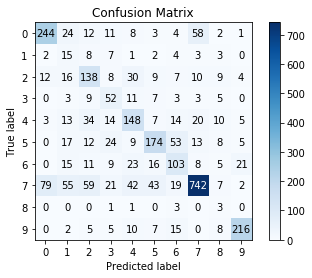

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits as load_data
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import scikitplot as skplt
predictions = rf.predict(test_features)
plot = skplt.metrics.plot_confusion_matrix(predictions , test_label_ids, normalize=False)
plt.show()

# Colorful Normalized Random Forest Confusion Matrix

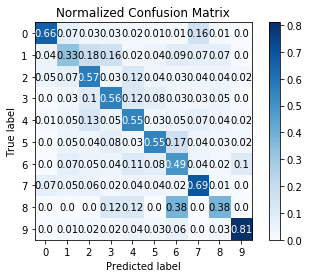

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits as load_data
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import scikitplot as skplt
predictions = rf.predict(test_features)
plot = skplt.metrics.plot_confusion_matrix(predictions , test_label_ids, normalize=True)
plt.show()

# ROC CURVE Random Forest

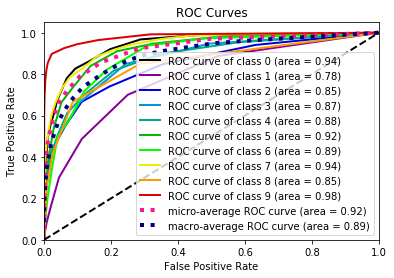

In [0]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators = 20, random_state = 42,max_features=4)

rf.fit(train_features, train_label_ids)


predicted_probas = rf.predict_proba(test_features)


skplt.metrics.plot_roc(test_label_ids, predicted_probas)
plt.show()


# Precision Recall RF

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


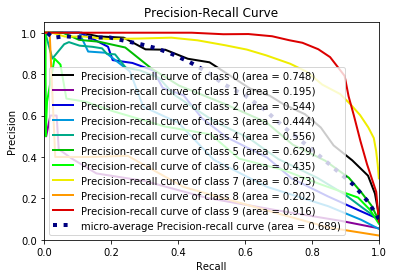

In [0]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators = 20, random_state = 42,max_features=4)

rf.fit(train_features, train_label_ids)


predicted_probas = rf.predict_proba(test_features)

skplt.metrics.plot_precision_recall_curve(test_label_ids, predicted_probas)
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


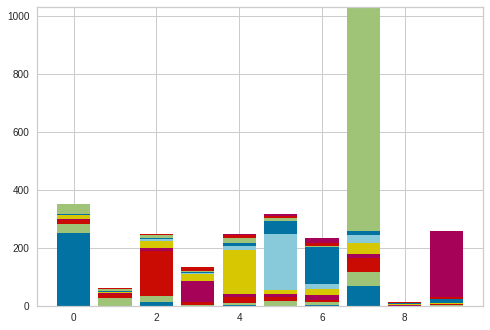

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.datasets import load_credit




classes = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']


# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(n_estimators=20), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(train_features, train_label_ids)

# Evaluate the model on the test data
visualizer.score(test_features, test_label_ids)

# Draw visualization
plt.show()

# SVM classifier

In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_features, train_label_ids)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predictions_svm = svclassifier.predict(test_features)

In [0]:
accuracy=accuracy_score(predictions_svm , test_label_ids)
print('Accuracy:', accuracy*100, '%.')

Accuracy: 89.50467613439557 %.


# Classification Report  and Confusion Matrix SVM 

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(predictions_svm, test_label_ids))
print(classification_report(predictions_svm, test_label_ids))

[[325   9   7   0   2   0   0  10   0   0]
 [  2  98  18   3  11   6   9   3   0   1]
 [  0  26 248   9  11   4   2   2   0   1]
 [  0   4   5 125   7   0   2   1   0   1]
 [  0   4   5   9 236   1   4   1   1   0]
 [  0   3   0   1   1 231  17   5   2   0]
 [  1   7   2   2   9  21 183   1   1   3]
 [ 12   8   3   3   2   3   1 834   0   0]
 [  0   1   0   0   1   2   0   0  56   0]
 [  0   0   0   0   3   0   7   0   0 248]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       353
           1       0.61      0.65      0.63       151
           2       0.86      0.82      0.84       303
           3       0.82      0.86      0.84       145
           4       0.83      0.90      0.87       261
           5       0.86      0.89      0.88       260
           6       0.81      0.80      0.80       230
           7       0.97      0.96      0.97       866
           8       0.93      0.93      0.93        60
           9       0.98     

# Colorful SVM Confusion Matrix

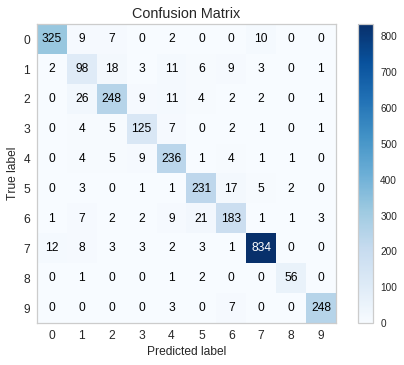

In [0]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits as load_data
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import scikitplot as skplt
# predictions_svm = svclassifier.predict(test_features)
plot = skplt.metrics.plot_confusion_matrix(predictions_svm , test_label_ids, normalize=False)
plt.show()

# Colorful SVM normalized Confusion Matrix

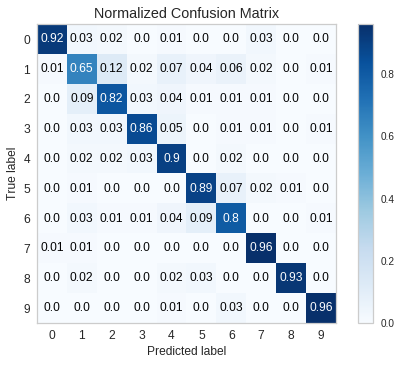

In [0]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits as load_data
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import scikitplot as skplt
# predictions_svm = svclassifier.predict(test_features)
plot = skplt.metrics.plot_confusion_matrix(predictions_svm , test_label_ids, normalize=True)
plt.show()

# SVM ROC 

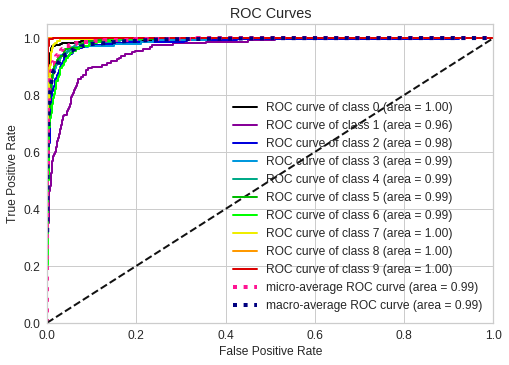

In [0]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scikitplot as skplt

svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(train_features, train_label_ids)



predicted_probas = svclassifier.predict_proba(test_features)


skplt.metrics.plot_roc(test_label_ids, predicted_probas)
plt.show()


# SVM Precision Recall

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


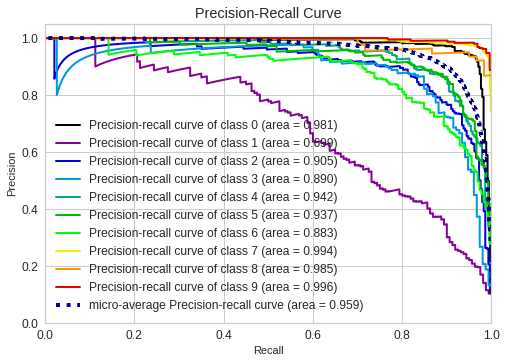

In [0]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scikitplot as skplt

# svclassifier = SVC(kernel='linear',probability=True)
# svclassifier.fit(train_features, train_label_ids)



# predicted_probas = svclassifier.predict_proba(test_features)


skplt.metrics.plot_precision_recall_curve(test_label_ids, predicted_probas)
plt.show()


# Visualization

In [0]:
import glob

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

%matplotlib inline

In [0]:
layer_outputs = [layer.output for layer in model.layers[:12] if not layer.name.startswith('input') ] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

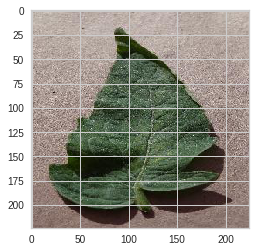

In [0]:

from keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Colab Notebooks/dataset_80_20/dataset_final/test/Tomato___Spider_mites Two-spotted_spider_mite/12019ba6-405d-45b7-b0e6-5a6a665de0e7___Com.G_SpM_FL 8624.JPG",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [0]:
activations = activation_model.predict(img)

In [0]:
layer_names = []
for layer in model.layers[1:15]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')